## Assignment - birth weight data

Birth weight is a situation where, while the data itself is actually fairly normal and symmetric, our main goal is actually *not* to model mean weight (via OLS), but rather to identify mothers at risk of having children below a certain "at-risk" threshold weight.

Quantile regression gives us just the tool we need. For the data we are using, see: http://people.reed.edu/~jones/141/BirthWgt.html

    bwt: baby's weight in ounces at birth
    gestation: duration of pregnancy in days
    parity: parity indicator (first born = 1, later birth = 0)
    age: mother's age in years
    height: mother's height in inches
    weight: mother's weight in pounds (during pregnancy)
    smoke: indicator for whether mother smokes (1=yes, 0=no) 
    
Use this data and `statsmodels` to fit a quantile regression, predicting `bwt` (birth weight) as a function of the other covariates. First, identify an appropriate `q` (quantile) to target a cutoff of 90 ounces - babies above that birth weight are generally healthy/safe, babies below are at-risk.

Then, fit and iterate your model. Be creative! You may want to engineer features. Hint - mother's age likely is not simply linear in its impact, and the other features may interact as well.

At the end, create at least *2* tables and *1* visualization to summarize your best model. Then (in writing) answer the following questions:

- What characteristics of a mother indicate the highest likelihood of an at-risk (low weight) baby?
- What can expectant mothers be told to help mitigate this risk?

Note that second question is not exactly a data science question - and that's okay! You're not expected to be a medical expert, but it is a good exercise to do a little bit of digging into a particular domain and offer informal but informed opinions.

In [423]:
import statsmodels.formula.api as smf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [424]:
bwt_df = pd.read_csv('http://people.reed.edu/~jones/141/Bwt.dat')
bwt_df.head()

,bwt,gestation,parity,age,height,weight,smoke
0,120,284,0,27,62,100,0
1,113,282,0,33,64,135,0
2,128,279,0,28,64,115,1
3,108,282,0,23,67,125,1
4,136,286,0,25,62,93,0


In [425]:
bwt_df.describe()


,bwt,gestation,parity,age,height,weight,smoke
count,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000
mean,119.462521,279.101363,0.262351,27.228279,64.049404,128.478705,0.390971
std,18.328671,16.010305,0.440100,5.817839,2.526102,20.734282,0.488176
min,55.000000,148.000000,0.000000,15.000000,53.000000,87.000000,0.000000
25%,108.000000,272.000000,0.000000,23.000000,62.000000,114.250000,0.000000
50%,120.000000,280.000000,0.000000,26.000000,64.000000,125.000000,0.000000
75%,131.000000,288.000000,1.000000,31.000000,66.000000,139.000000,1.000000
max,176.000000,353.000000,1.000000,45.000000,72.000000,250.000000,1.000000


In [426]:
# TODO - your work here! Also, add text cells for written questions.

In [427]:
bwt_df[bwt_df['bwt']<=90]['bwt'].count() / bwt_df["bwt"].count()


0.05792163543441227

In [428]:
bwt_df["age"] = bwt_df["age"]
bwt_df["height"] = bwt_df["height"]

In [429]:
#useless
# bwt_df["over41"] = bwt_df["age"].apply(lambda x : 1 if x >41 else 0 )
#bwt_df["over31"] = bwt_df["age"].apply(lambda x : 1 if x >=31 else 0 )
# #31 works when 30 does not. problem not understood.

In [430]:
# # useless
# bwt_df["under20"] = bwt_df["age"].apply(lambda x : 1 if x < 20 else 0 )
# bwt_df["under30"] = bwt_df["age"].apply(lambda x : 1 if x < 30 else 0 )
# bwt_df["below_2_std_height"] = bwt_df['height'].apply(lambda x : 1 if ( 
#     x -  np.mean(bwt_df["height"]) ) /  np.std(bwt_df["height"]) <=-2 else 0)
# bwt_df["abs_age_zscore"] = abs(( bwt_df["age"] -  np.mean(bwt_df["age"]) ) /  np.std(bwt_df["age"]))

In [431]:
bwt_df["abs_weight_zscore"] = abs(( bwt_df["weight"] -  np.mean(bwt_df["weight"]) ) /  np.std(bwt_df["weight"]))


In [432]:
bwt_df["age_parity"] = bwt_df["age"] * bwt_df["parity"]

In [433]:
quant_formula = 'bwt ~ ' + ' + '.join(bwt_df.drop(['bwt',"weight","age"], axis='columns').columns)
quant_mod = smf.quantreg(quant_formula, data=bwt_df)
quant_reg = quant_mod.fit(q=.06)
quant_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                    bwt   Pseudo R-squared:               0.2091
Model:                       QuantReg   Bandwidth:                       6.304
Method:                 Least Squares   Sparsity:                        108.2
Date:                Wed, 23 Jan 2019   No. Observations:                 1174
Time:                        17:13:37   Df Residuals:                     1167
                                        Df Model:                            6
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -58.7125     26.962     -2.178      0.030    -111.612      -5.813
gestation             0.4734      0.078      6.095      0.000       0.321       0.626
parity                7.1552      7.184      0.996      0.319      -6.939      21.250
height                0.4789      0.296      1.617      0.106      -0.102       1.060
smoke                -9.3142      1.579     -5.898      0.000     -12.412      -6.216
abs_weight_zscore    -5.9759      0.998     -5.986      0.000      -7.935      -4.017
age_parity           -0.4273      0.295     -1.448      0.148      -1.006       0.152
=====================================================================================

The condition number is large, 8.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

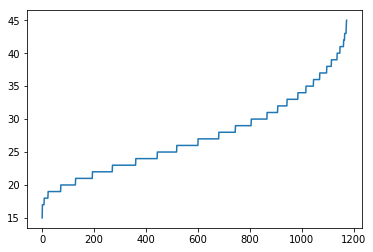

In [434]:
plt.plot(bwt_df["age"].sort_values().values)

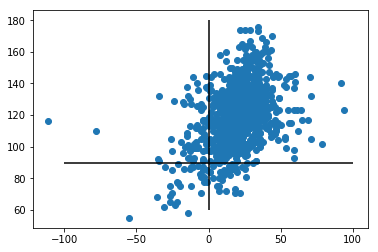

In [435]:
plt.scatter(bwt_df["gestation"]-259,bwt_df["bwt"])
plt.hlines(90,-100,100)
plt.vlines(0,60,180)


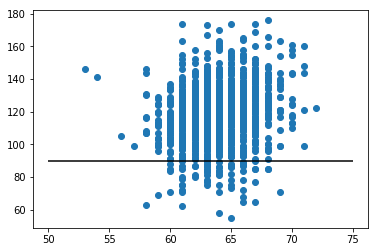

In [436]:
plt.scatter(bwt_df["height"],bwt_df["bwt"])
plt.hlines(90,50,75)


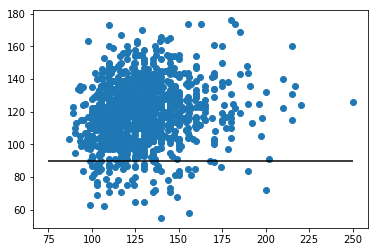

In [437]:
plt.scatter(bwt_df["weight"],bwt_df["bwt"])
plt.hlines(90,75,250)


In [439]:
quant_formula = 'bwt ~ gestation + abs_weight_zscore + smoke' 
quant_mod = smf.quantreg(quant_formula, data=bwt_df)
quant_reg = quant_mod.fit(q=.06)
quant_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                    bwt   Pseudo R-squared:               0.1980
Model:                       QuantReg   Bandwidth:                       6.300
Method:                 Least Squares   Sparsity:                        111.8
Date:                Wed, 23 Jan 2019   No. Observations:                 1174
Time:                        17:13:50   Df Residuals:                     1170
                                        Df Model:                            3
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -30.3507     22.179     -1.368      0.171     -73.865      13.164
gestation             0.4762      0.079      6.023      0.000       0.321       0.631
abs_weight_zscore    -5.7486      0.983     -5.846      0.000      -7.678      -3.819
smoke                -7.9333      1.613     -4.918      0.000     -11.098      -4.768
=====================================================================================

The condition number is large, 4.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
quantiles = np.arange(.05, .96, .1)
def fit_model(q):
    res = mod.fit(q=q)
    return [q, res.params['Intercept'], res.params['income']] + \
            res.conf_int().loc['income'].tolist()
    
models = [fit_model(x) for x in quantiles]
models = pd.DataFrame(models, columns=['q', 'a', 'b','lb','ub'])

## Observations
- after adding the weight_zscore feature, t statistic of age factors dropped below 1. Previously they had t-statistics indicating significance and larger coefficients